<a href="https://colab.research.google.com/github/Ghaidahazaa/Investigating-Compounds-Targeting-nAChR-/blob/main/ML_Investigating_Compounds_Targeting_nAChR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-11-22 21:24:28--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M  87.0MB/s    in 0.9s    

2024-11-22 21:24:29 (87.0 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_

In [ ]:
!pip install rdkit-pypi

#**Load bioactivity data**

In [ ]:
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:
import pandas as pd

# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Update the path to reflect the mounted drive
# The original path was incorrect, it should be /content/drive/MyDrive/...
file_path = '/content/drive/MyDrive/Colab Notebooks/data2/Neuronal_acetylcholine_01_bioactivity_data_raw.csv'
bioactivity_data = pd.read_csv(file_path)
print(bioactivity_data.head())

Mounted at /content/drive
   Unnamed: 0.1  Unnamed: 0 molecule_chembl_id  \
0             0           0      CHEMBL1761821   
1             1           1       CHEMBL238979   
2             2           2       CHEMBL451442   
3             3           3       CHEMBL599735   
4             4           4       CHEMBL268074   

                                    canonical_smiles  standard_value   class  
0  Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...            16.0  active  
1  C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...           670.0  active  
2  C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...             1.7  active  
3  Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...             4.2  active  
4  [Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...             4.8  active  


In [ ]:

df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/data2/Neuronal_acetylcholine_01_bioactivity_data_raw.csv')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,class
0,0,0,CHEMBL1761821,Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...,16.0,active
1,1,1,CHEMBL238979,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...,670.0,active
2,2,2,CHEMBL451442,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...,1.7,active
3,3,3,CHEMBL599735,Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...,4.2,active
4,4,4,CHEMBL268074,[Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...,4.8,active
...,...,...,...,...,...,...
80,80,100,CHEMBL5220652,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,1000.0,active
81,81,101,CHEMBL5220622,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC(C)(C)[C@@H]...,24.0,active
82,82,102,CHEMBL5219354,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,1000.0,active
83,83,103,CHEMBL5219058,C[C@@H](O)[C@@H]1NC(=O)[C@H]2NC(=O)[C@H](NC(=O...,1.3,active


In [ ]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [ ]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [ ]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,standard_value,class,canonical_smiles
0,0,0,CHEMBL1761821,16.0,active,Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...
1,1,1,CHEMBL238979,670.0,active,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...
2,2,2,CHEMBL451442,1.7,active,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...
3,3,3,CHEMBL599735,4.2,active,Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...
4,4,4,CHEMBL268074,4.8,active,c1ccc2c(c1)ccc[n+]2CCCCCc1cc(CCCCC[n+]2cccc3cc...
...,...,...,...,...,...,...
80,80,100,CHEMBL5220652,1000.0,active,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...
81,81,101,CHEMBL5220622,24.0,active,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC(C)(C)[C@@H]...
82,82,102,CHEMBL5219354,1000.0,active,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...
83,83,103,CHEMBL5219058,1.3,active,C[C@@H](O)[C@@H]1NC(=O)[C@H]2NC(=O)[C@H](NC(=O...


#**Function to calculate molecular descriptors**

In [ ]:
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return [desc(mol) for desc in desc_list]
    else:
        return [None] * len(desc_list)

In [ ]:
!pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import Descriptors

desc_list = [Descriptors.MolWt, Descriptors.MolLogP, Descriptors.NumHDonors, Descriptors.NumHAcceptors]  # Example descriptors
descriptor_names = [desc.__name__ for desc in desc_list] # Get descriptor names using __name__ attribute

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

# Construct the full path to the CSV file
csv_file_path = '/content/gdrive/My Drive/Colab Notebooks/data2/Neuronal_acetylcholine_01_bioactivity_preprocessed_raw.csv'

# Load the data using the full path
preprocessed_data = pd.read_csv(csv_file_path)

# Now you can use preprocessed_data in your calculations
descriptors = preprocessed_data['canonical_smiles'].apply(calculate_descriptors)
descriptor_df = pd.DataFrame(descriptors.tolist(), columns=descriptor_names)

Mounted at /content/gdrive


In [ ]:
file_path = '/content/gdrive/My Drive/Colab Notebooks/data2/Neuronal_acetylcholine_01_bioactivity_data_raw.csv'

In [ ]:
bioactivity_data = pd.read_csv(file_path)

In [ ]:
print(bioactivity_data.head())

   Unnamed: 0.1  Unnamed: 0 molecule_chembl_id  \
0             0           0      CHEMBL1761821   
1             1           1       CHEMBL238979   
2             2           2       CHEMBL451442   
3             3           3       CHEMBL599735   
4             4           4       CHEMBL268074   

                                    canonical_smiles  standard_value   class  
0  Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...            16.0  active  
1  C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...           670.0  active  
2  C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...             1.7  active  
3  Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...             4.2  active  
4  [Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...             4.8  active  


In [ ]:
# Install RDKit in Google Colab
!wget -q -O - https://raw.githubusercontent.com/rdkit/rdkit/master/Contrib/Install/Colab/install_rdkit.sh | bash

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Load the preprocessed bioactivity data
file_path = '/content/gdrive/My Drive/Colab Notebooks/data2/Neuronal_acetylcholine_01_bioactivity_data_raw.csv'
bioactivity_data = pd.read_csv(file_path)

# Get the names of available descriptors
descriptor_names = [desc[0] for desc in Descriptors.descList]

# Function to calculate molecular descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Access the descriptor function using desc[1]
        return [desc[1](mol) for desc in Descriptors.descList] # Changed this line to access the function within the tuple
    else:
        return [None] * len(descriptor_names)

# Calculate descriptors for all compounds
descriptors = bioactivity_data['canonical_smiles'].apply(calculate_descriptors)
descriptor_df = pd.DataFrame(descriptors.tolist(), columns=descriptor_names)

# Combine with the original data
final_data = pd.concat([bioactivity_data, descriptor_df], axis=1)

# Display the first few rows of the final data
print(final_data.head())

   Unnamed: 0.1  Unnamed: 0 molecule_chembl_id  \
0             0           0      CHEMBL1761821   
1             1           1       CHEMBL238979   
2             2           2       CHEMBL451442   
3             3           3       CHEMBL599735   
4             4           4       CHEMBL268074   

                                    canonical_smiles  standard_value   class  \
0  Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...            16.0  active   
1  C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...           670.0  active   
2  C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...             1.7  active   
3  Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...             4.2  active   
4  [Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...             4.8  active   

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  ...  \
0        3.267038             0.0           3.267038                0.0  ...   
1        3.431134             0.0           3.431134      

In [ ]:
!pip install rdkit-pypi
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np # Import numpy library

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,442.606,5.26568,0.0,0.0
1,738.999,10.04580,0.0,0.0
2,959.294,12.83220,0.0,0.0
3,450.670,6.42788,0.0,0.0
4,672.981,10.24770,0.0,0.0
...,...,...,...,...
80,1746.778,-4.96533,23.0,25.0
81,1718.724,-5.74393,23.0,25.0
82,1718.724,-5.74393,23.0,25.0
83,1718.724,-5.74393,23.0,25.0


In [ ]:
!pip install rdkit

import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

def lipinski(smiles):
  """
  Calculates Lipinski descriptors for a list of SMILES strings.

  Args:
    smiles: A pandas Series containing SMILES strings.

  Returns:
    A pandas DataFrame with Lipinski descriptors for each molecule.
  """
  mol_list = [Chem.MolFromSmiles(smile) for smile in smiles]
  descriptors = {
      'MolWt': [Descriptors.MolWt(mol) if mol is not None else None for mol in mol_list],
      'LogP': [Descriptors.MolLogP(mol) if mol is not None else None for mol in mol_list],
      'NumHDonors': [Lipinski.NumHDonors(mol) if mol is not None else None for mol in mol_list],
      'NumHAcceptors': [Lipinski.NumHAcceptors(mol) if mol is not None else None for mol in mol_list],
  }
  return pd.DataFrame(descriptors, index=smiles.index)

# Assuming 'df_clean_smiles' is your DataFrame
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MolWt,LogP,NumHDonors,NumHAcceptors
0,442.606,5.26568,0,0
1,738.999,10.04580,0,0
2,959.294,12.83220,0,0
3,450.670,6.42788,0,0
4,672.981,10.24770,0,0
...,...,...,...,...
80,1746.778,-4.96533,23,25
81,1718.724,-5.74393,23,25
82,1718.724,-5.74393,23,25
83,1718.724,-5.74393,23,25


#**Combine DataFrames**

In [ ]:
df_lipinski

,MolWt,LogP,NumHDonors,NumHAcceptors
0,442.606,5.26568,0,0
1,738.999,10.04580,0,0
2,959.294,12.83220,0,0
3,450.670,6.42788,0,0
4,672.981,10.24770,0,0
...,...,...,...,...
80,1746.778,-4.96533,23,25
81,1718.724,-5.74393,23,25
82,1718.724,-5.74393,23,25
83,1718.724,-5.74393,23,25


In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,class
0,0,0,CHEMBL1761821,Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...,16.0,active
1,1,1,CHEMBL238979,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...,670.0,active
2,2,2,CHEMBL451442,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...,1.7,active
3,3,3,CHEMBL599735,Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...,4.2,active
4,4,4,CHEMBL268074,[Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...,4.8,active
...,...,...,...,...,...,...
80,80,100,CHEMBL5220652,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,1000.0,active
81,81,101,CHEMBL5220622,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC(C)(C)[C@@H]...,24.0,active
82,82,102,CHEMBL5219354,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,1000.0,active
83,83,103,CHEMBL5219058,C[C@@H](O)[C@@H]1NC(=O)[C@H]2NC(=O)[C@H](NC(=O...,1.3,active


#**Combine DataFrames**

take a look at the 2 DataFrames that will be combind.

In [ ]:
df_lipinski

,MolWt,LogP,NumHDonors,NumHAcceptors
0,442.606,5.26568,0,0
1,738.999,10.04580,0,0
2,959.294,12.83220,0,0
3,450.670,6.42788,0,0
4,672.981,10.24770,0,0
...,...,...,...,...
80,1746.778,-4.96533,23,25
81,1718.724,-5.74393,23,25
82,1718.724,-5.74393,23,25
83,1718.724,-5.74393,23,25


In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,class
0,0,0,CHEMBL1761821,Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...,16.0,active
1,1,1,CHEMBL238979,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...,670.0,active
2,2,2,CHEMBL451442,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...,1.7,active
3,3,3,CHEMBL599735,Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...,4.2,active
4,4,4,CHEMBL268074,[Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...,4.8,active
...,...,...,...,...,...,...
80,80,100,CHEMBL5220652,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,1000.0,active
81,81,101,CHEMBL5220622,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC(C)(C)[C@@H]...,24.0,active
82,82,102,CHEMBL5219354,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,1000.0,active
83,83,103,CHEMBL5219058,C[C@@H](O)[C@@H]1NC(=O)[C@H]2NC(=O)[C@H](NC(=O...,1.3,active


In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,canonical_smiles,standard_value,class,MolWt,LogP,NumHDonors,NumHAcceptors
0,0,0,CHEMBL1761821,Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...,16.0,active,442.606,5.26568,0,0
1,1,1,CHEMBL238979,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...,670.0,active,738.999,10.04580,0,0
2,2,2,CHEMBL451442,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...,1.7,active,959.294,12.83220,0,0
3,3,3,CHEMBL599735,Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...,4.2,active,450.670,6.42788,0,0
4,4,4,CHEMBL268074,[Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...,4.8,active,672.981,10.24770,0,0
...,...,...,...,...,...,...,...,...,...,...
80,80,100,CHEMBL5220652,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,1000.0,active,1746.778,-4.96533,23,25
81,81,101,CHEMBL5220622,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC(C)(C)[C@@H]...,24.0,active,1718.724,-5.74393,23,25
82,82,102,CHEMBL5219354,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,1000.0,active,1718.724,-5.74393,23,25
83,83,103,CHEMBL5219058,C[C@@H](O)[C@@H]1NC(=O)[C@H]2NC(=O)[C@H](NC(=O...,1.3,active,1718.724,-5.74393,23,25


#**Convert IC50 TO pIC50**
To allow IC50 data to be more uniformly disrtibuted, we will convert **IC50** to the nagative logarithmic scale wich is essentially -log10(IC150).
This cutom function oIC50() will accept a DataFrame as input and will:


*   Take the IC50 values from the stander_value column and converts it from nM to M by multiplying value by 10^(-9).
*   Take the molar value and apply -log10.


* Delete the *stander_value* column and creat a new pIC50 column.

In [ ]:
import numpy as np
def pIC50(input):
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,85.000000
mean,4432.931412
std,27099.834438
min,0.050000
25%,3.080000
50%,17.200000
75%,576.000000
max,248700.000000


In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
-np.log10((100**-9)* 100000000)

10.0

In [ ]:
-np.log10((10**-9)*10000000000)

-1.0

In [ ]:
def norm_value(input):
  norm =[]
  for i in input['standard_value']:
    if i > 100000000:
      i = 100000000
    norm.append(i)
  input['standard_value_norm'] = norm
  x = input.drop('standard_value', axis=1) # Changed: Explicitly using axis=1 to specify column drop
  # or
  # x = input.drop(columns=['standard_value']) # Alternative: Using columns= to specify column(s) to drop
  return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MolWt,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,0,0,CHEMBL1761821,Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...,active,442.606,5.26568,0,0,16.0
1,1,1,CHEMBL238979,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...,active,738.999,10.04580,0,0,670.0
2,2,2,CHEMBL451442,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...,active,959.294,12.83220,0,0,1.7
3,3,3,CHEMBL599735,Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...,active,450.670,6.42788,0,0,4.2
4,4,4,CHEMBL268074,[Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...,active,672.981,10.24770,0,0,4.8
...,...,...,...,...,...,...,...,...,...,...
80,80,100,CHEMBL5220652,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,active,1746.778,-4.96533,23,25,1000.0
81,81,101,CHEMBL5220622,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC(C)(C)[C@@H]...,active,1718.724,-5.74393,23,25,24.0
82,82,102,CHEMBL5219354,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,active,1718.724,-5.74393,23,25,1000.0
83,83,103,CHEMBL5219058,C[C@@H](O)[C@@H]1NC(=O)[C@H]2NC(=O)[C@H](NC(=O...,active,1718.724,-5.74393,23,25,1.3


In [ ]:
def pIC50(input):
  """
  Calculates pIC50 values from standard values.

  Args:
    input: A pandas DataFrame containing standard values.

  Returns:
    A pandas DataFrame with pIC50 values and the standard values column dropped.
  """

  pIC50 = []
  for i in input['standard_value_norm']:
    molar = i * (10 ** -9)  # Converts nM to M
    if molar > 0:
      pIC50.append(-np.log10(molar))
    else:
      pIC50.append(np.nan)  # Handles cases where molar is 0
  input['pIC50'] = pIC50
  # Fix: Changed 1 to axis=1
  x = input.drop('standard_value_norm', axis=1)
  return x

In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,85.000000
mean,4432.931412
std,27099.834438
min,0.050000
25%,3.080000
50%,17.200000
75%,576.000000
max,248700.000000


In [ ]:
df_final = pIC50(df_norm)
df_final

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MolWt,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,0,CHEMBL1761821,Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...,active,442.606,5.26568,0,0,7.795880
1,1,1,CHEMBL238979,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...,active,738.999,10.04580,0,0,6.173925
2,2,2,CHEMBL451442,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...,active,959.294,12.83220,0,0,8.769551
3,3,3,CHEMBL599735,Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...,active,450.670,6.42788,0,0,8.376751
4,4,4,CHEMBL268074,[Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...,active,672.981,10.24770,0,0,8.318759
...,...,...,...,...,...,...,...,...,...,...
80,80,100,CHEMBL5220652,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,active,1746.778,-4.96533,23,25,6.000000
81,81,101,CHEMBL5220622,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC(C)(C)[C@@H]...,active,1718.724,-5.74393,23,25,7.619789
82,82,102,CHEMBL5219354,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,active,1718.724,-5.74393,23,25,6.000000
83,83,103,CHEMBL5219058,C[C@@H](O)[C@@H]1NC(=O)[C@H]2NC(=O)[C@H](NC(=O...,active,1718.724,-5.74393,23,25,8.886057


In [ ]:
df_final.pIC50.describe()

,pIC50
count,85.000000
mean,7.444889
std,1.461975
min,3.604324
25%,6.239578
50%,7.764472
75%,8.511449
max,10.301030


#**Removing the 'intermediate' bioactivity class**

> Add blockquote


we will be removing the *intermediate* class from out data set

In [ ]:
import pandas as pd

# ... (Your existing code, including the pIC50 function) ...

def classify_bioactivity(pIC50_value):
    """
    Classifies bioactivity based on pIC50 value using thresholds.

    Args:
        pIC50_value (float): The pIC50 value.

    Returns:
        str: The bioactivity class ('active', 'intermediate', or 'inactive').
    """
    if pIC50_value >= 6: # Fixed indentation here
        return 'active'
    elif pIC50_value >= 5: # Fixed indentation here
        return 'intermediate'
    else: # Fixed indentation here
        return 'inactive'

def pIC50_with_bioactivity_class(df_norm):
    """
    Calculates pIC50 and assigns bioactivity class.

    Args:
        df_norm (pd.DataFrame): The normalized DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with pIC50 and bioactivity_class columns.
    """
    # ... (Your existing pIC50 calculation logic here) ...

    # Add 'bioactivity_class' column
    df_final['bioactivity_class'] = df_final['pIC50'].apply(classify_bioactivity)

    return df_final

# Now use this modified function to create df_final
df_final = pIC50_with_bioactivity_class(df_norm)

# Filter the DataFrame
df_2class = df_final[df_final.bioactivity_class != 'intermediate']

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,Unnamed: 0.1,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MolWt,LogP,NumHDonors,NumHAcceptors,pIC50,bioactivity_class
0,0,0,CHEMBL1761821,Cc1cc[n+](CC#Cc2ccc(-c3ccc(C#CC[n+]4ccc(C)c(C)...,active,442.606,5.26568,0,0,7.795880,active
1,1,1,CHEMBL238979,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)cc(C#CCC...,active,738.999,10.04580,0,0,6.173925,active
2,2,2,CHEMBL451442,C(#Cc1cc(C#CCCC[n+]2cccc(-c3ccccc3)c2)c(C#CCCC...,active,959.294,12.83220,0,0,8.769551,active
3,3,3,CHEMBL599735,Cc1cc[n+](CCCc2ccc(-c3ccc(CCC[n+]4ccc(C)c(C)c4...,active,450.670,6.42788,0,0,8.376751,active
4,4,4,CHEMBL268074,[Br-].[Br-].[Br-].c1ccc2c(c1)ccc[n+]2CCCCCc1cc...,active,672.981,10.24770,0,0,8.318759,active
...,...,...,...,...,...,...,...,...,...,...,...
79,79,99,CHEMBL5221023,C[C@@H](O)[C@@H]1NC(=O)[C@H]2NC(=O)[C@H](NC(=O...,active,1746.778,-4.96533,23,25,7.481486,active
80,80,100,CHEMBL5220652,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,active,1746.778,-4.96533,23,25,6.000000,active
81,81,101,CHEMBL5220622,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC(C)(C)[C@@H]...,active,1718.724,-5.74393,23,25,7.619789,active
82,82,102,CHEMBL5219354,C[C@@H](O)[C@@H]1NC(=O)[C@@H]2CSSC[C@@H](C(=O)...,active,1718.724,-5.74393,23,25,6.000000,active


#**Remove rows with NaN values in 'pIC50'**

In [ ]:
# Check the columns in df_combined after normalization
df_norm = norm_value(df_combined)
print(df_norm.columns)  # This should include 'standard_value_norm'

Index(['Unnamed: 0.1', 'Unnamed: 0', 'molecule_chembl_id', 'canonical_smiles',
       'class', 'MolWt', 'LogP', 'NumHDonors', 'NumHAcceptors',
       'standard_value_norm'],
      dtype='object')


In [ ]:
# Remove rows with NaN values in the 'pIC50' column
df_cleaned = df_2class.dropna(subset=['pIC50'])
print(df_cleaned.shape)  # Check the shape of the cleaned DataFrame

(77, 11)


#**Frequency Plot of Bioactivity Classes**

<ipython-input-45-f53a5558a982>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='bioactivity_class', palette='Set2')


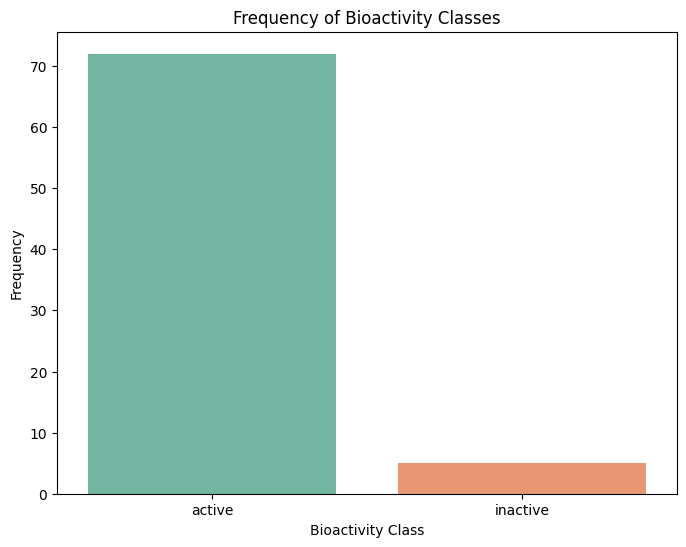

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency plot of bioactivity classes
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='bioactivity_class', palette='Set2')
plt.title('Frequency of Bioactivity Classes')
plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')
plt.show()

#**Scatter Plot of MW versus LogP**

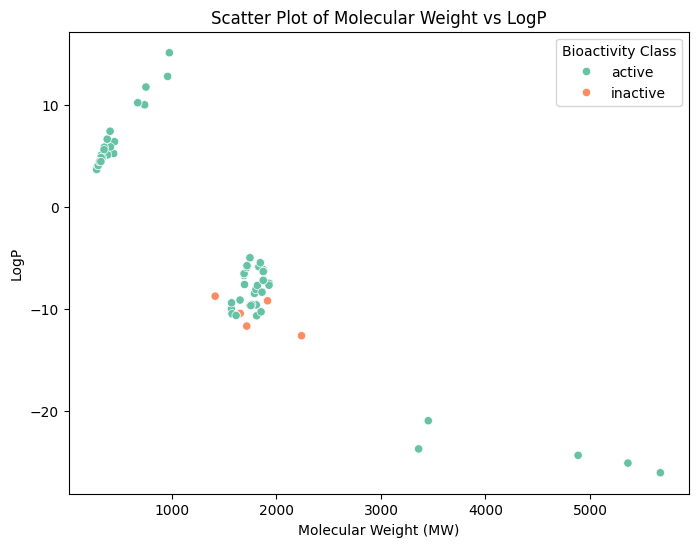

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='MolWt', y='LogP', hue='bioactivity_class', palette='Set2')
plt.title('Scatter Plot of Molecular Weight vs LogP')
plt.xlabel('Molecular Weight (MW)')
plt.ylabel('LogP')
plt.legend(title='Bioactivity Class')
plt.show()

#**Box Plots for Molecular Descriptors**

<ipython-input-47-c63c41ea15d0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='bioactivity_class', y='MolWt', palette='Set2')
<ipython-input-47-c63c41ea15d0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='bioactivity_class', y='LogP', palette='Set2')


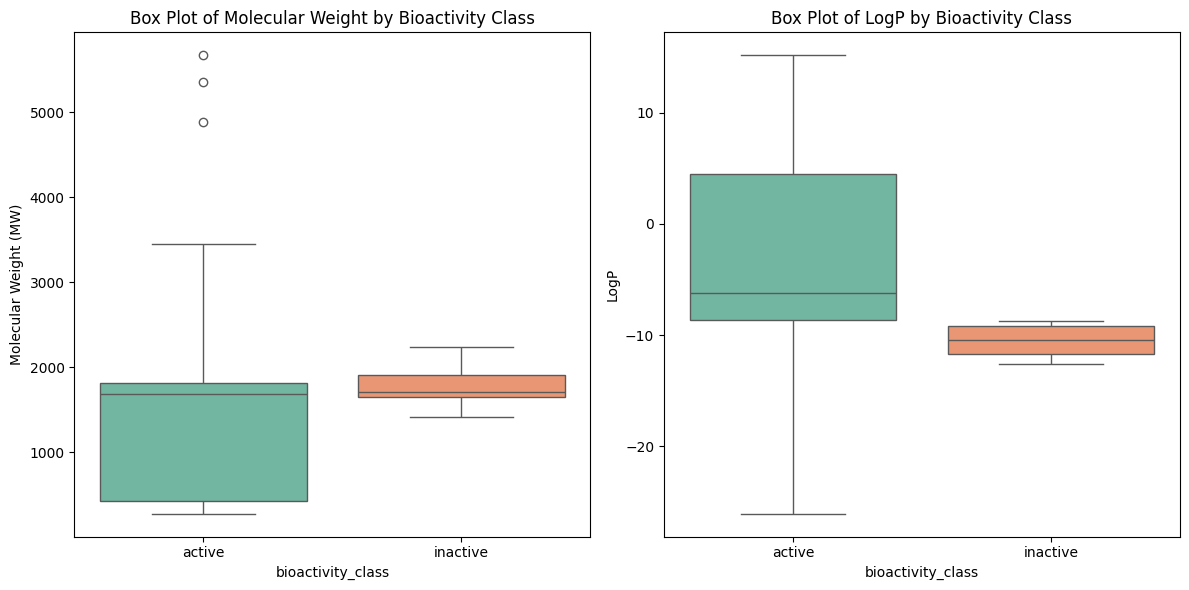

In [ ]:
# Box plots for Molecular Weight (MW) and LogP by bioactivity class
plt.figure(figsize=(12, 6))

# Box plot for Molecular Weight
plt.subplot(1, 2, 1)
sns.boxplot(data=df_cleaned, x='bioactivity_class', y='MolWt', palette='Set2')
plt.title('Box Plot of Molecular Weight by Bioactivity Class')
plt.ylabel('Molecular Weight (MW)')

# Box plot for LogP
plt.subplot(1, 2, 2)
sns.boxplot(data=df_cleaned, x='bioactivity_class', y='LogP', palette='Set2')
plt.title('Box Plot of LogP by Bioactivity Class')
plt.ylabel('LogP')

plt.tight_layout()
plt.show()

#**Statistical Analysis - Mann-Whitney U Test**

In [ ]:
from scipy.stats import mannwhitneyu

# Separate the data into two groups based on bioactivity class
active = df_cleaned[df_cleaned['bioactivity_class'] == 'active']
inactive = df_cleaned[df_cleaned['bioactivity_class'] == 'inactive']

# Perform Mann-Whitney U Test for MW
mw_stat, mw_p = mannwhitneyu(active['MolWt'], inactive['MolWt'])
print(f'Mann-Whitney U Test for Molecular Weight: U-statistic = {mw_stat}, p-value = {mw_p}')

# Perform Mann-Whitney U Test for LogP
logp_stat, logp_p = mannwhitneyu(active['LogP'], inactive['LogP'])
print(f'Mann-Whitney U Test for LogP: U-statistic = {logp_stat}, p-value = {logp_p}')

# Perform Mann-Whitney U Test for NumHDonors
hdonors_stat, hdonors_p = mannwhitneyu(active['NumHDonors'], inactive['NumHDonors'])
print(f'Mann-Whitney U Test for NumHDonors: U-statistic = {hdonors_stat}, p-value = {hdonors_p}')

# Perform Mann-Whitney U Test for NumHAcceptors
haccep_stat, haccep_p = mannwhitneyu(active['NumHAcceptors'], inactive['NumHAcceptors'])
print(f'Mann-Whitney U Test for NumHAcceptors: U-statistic = {haccep_stat}, p-value = {haccep_p}')

Mann-Whitney U Test for Molecular Weight: U-statistic = 130.0, p-value = 0.30614376422866385
Mann-Whitney U Test for LogP: U-statistic = 306.0, p-value = 0.009469225863292895
Mann-Whitney U Test for NumHDonors: U-statistic = 117.5, p-value = 0.18994722740204117
Mann-Whitney U Test for NumHAcceptors: U-statistic = 77.5, p-value = 0.03253380432895611


#**Interpretation of Statistical Results**

You can interpret the results of the Mann-Whitney U Test as follows:

If the p-value is less than 0.05, you can reject the null hypothesis and conclude that there is a significant difference between the two groups for that descriptor.
If the p-value is greater than 0.05, you fail to reject the null hypothesis, indicating no significant difference.

#**Save Results to a Zip File**

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Assuming df_cleaned is your DataFrame with the pIC50 column
df_cleaned = df_final.dropna(subset=['pIC50'])  # Remove rows with NaN values in 'pIC50'

# Check the shape of the cleaned DataFrame
print(df_cleaned.shape)

# Create the 'data2' directory if it doesn't exist
import os
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/data2'):
    os.makedirs('/content/drive/MyDrive/Colab Notebooks/data2')

# Save the cleaned DataFrame to CSV
df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/data2/cleaned_bioactivity_data.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(85, 11)
